<a href="https://colab.research.google.com/github/robinacharya/Ensemble-Machine-Learning-Algorithms-for-Real-World-Data-RWD-/blob/Decision-Tree/Decision_Tree_original(RWD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, auc, cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve

import pandas as pd
from google.colab import drive

In [2]:
# Load the dataset
# Assuming 'df' is the DataFrame containing the dataset
# Replace 'your_dataset.csv' with the actual file path or URL
# df = pd.read_csv('your_dataset.csv')

# Display the first few rows of the dataset
# df.head()


In [4]:
# Load the dataset
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load the dataset from Google Drive
path_to_dataset = "/content/drive/MyDrive/mutual_funds_data_Assignment.csv"
df = pd.read_csv(path_to_dataset)

In [7]:
# Data Preprocessing
# Check for missing values
missing_values = df.isnull().sum()
missing_values

scheme_name        0
min_sip            0
min_lumpsum        0
expense_ratio      0
fund_size_cr       0
fund_age_yr        0
fund_manager       0
sortino            0
alpha              0
sd                 0
beta               0
sharpe             0
risk_level         0
amc_name           0
rating             0
category           0
sub_category       0
returns_1yr        0
returns_3yr       30
returns_5yr      253
dtype: int64

In [8]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


In [9]:
df.describe()

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,risk_level,rating,returns_1yr,returns_3yr,returns_5yr
count,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1261.000000,1038.000000
mean,524.940356,3047.775368,0.703160,3935.234895,8.366383,4.405112,2.663826,3.960806,18.503489,9.515992
std,360.004923,2543.955553,0.473631,7284.321646,2.590038,1.816190,1.451570,6.091683,12.057879,3.677490
min,0.000000,0.000000,0.000000,2.380000,1.000000,1.000000,0.000000,-19.700000,3.300000,-4.100000
25%,100.000000,500.000000,0.310000,175.000000,7.000000,3.000000,2.000000,1.700000,6.200000,6.700000
50%,500.000000,5000.000000,0.600000,953.000000,10.000000,6.000000,3.000000,4.400000,18.700000,8.900000
75%,1000.000000,5000.000000,1.030000,4008.000000,10.000000,6.000000,4.000000,5.600000,27.400000,12.200000
max,2000.000000,25000.000000,2.590000,57052.000000,17.000000,6.000000,5.000000,130.800000,71.400000,23.200000


In [10]:
# Data Preprocessing
# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(include=['number']).columns

In [11]:
# Data Preprocessing
# Impute missing values in categorical columns with the most frequent value
for col in categorical_cols:
    if missing_values[col] > 0:
        imputer = SimpleImputer(strategy='most_frequent')
        # Reshape the output of fit_transform to be a 1D array
        df[col] = imputer.fit_transform(df[[col]]).ravel()

In [13]:
# Data Preprocessing
# Impute missing values in numeric columns with the mean
for col in numeric_cols:
    if missing_values[col] > 0:
        imputer = SimpleImputer(strategy='most_frequent')
        df[col] = imputer.fit_transform(df[[col]])

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


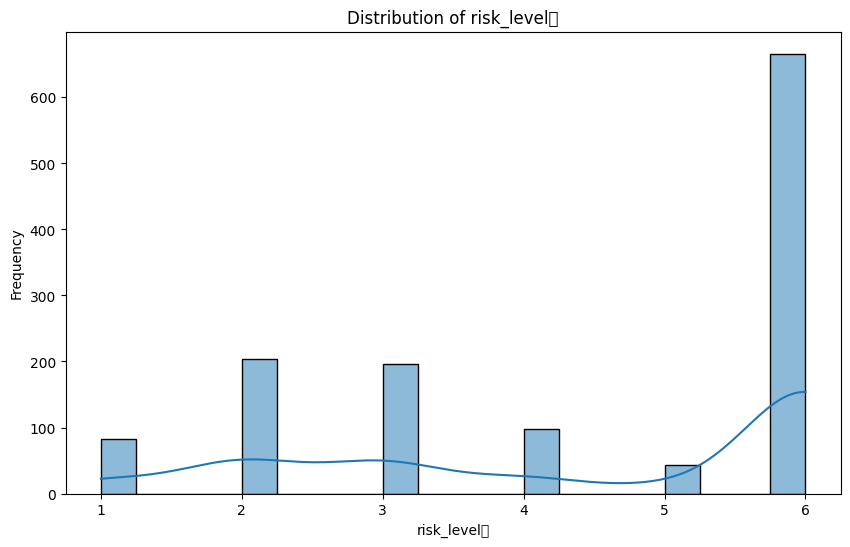

In [15]:
# Exploratory Data Analysis (EDA)

# Plot 1: Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['risk_level'], bins=20, kde=True)
plt.title('Distribution of risk_level	')
plt.xlabel('risk_level	')
plt.ylabel('Frequency')
plt.show()

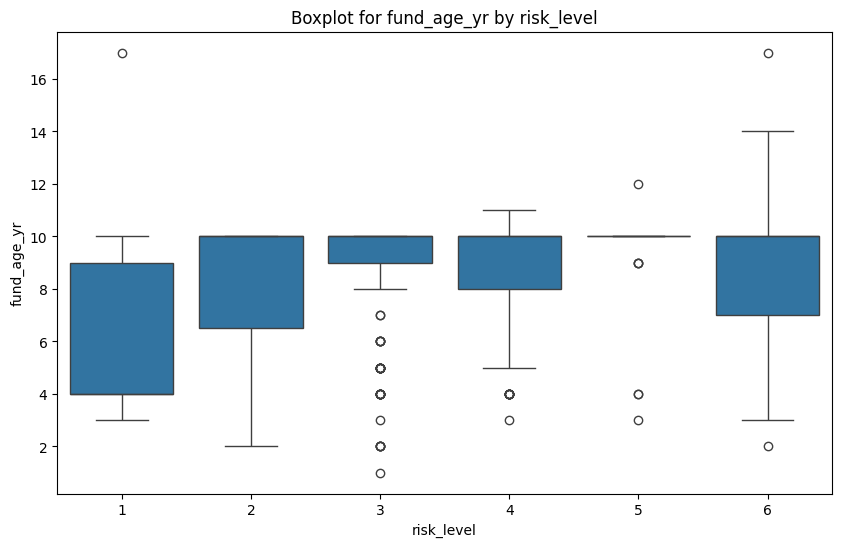

In [16]:
# Plot 2: Boxplot for Credit amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='risk_level', y='fund_age_yr', data=df)
plt.title('Boxplot for fund_age_yr by risk_level')
plt.show()


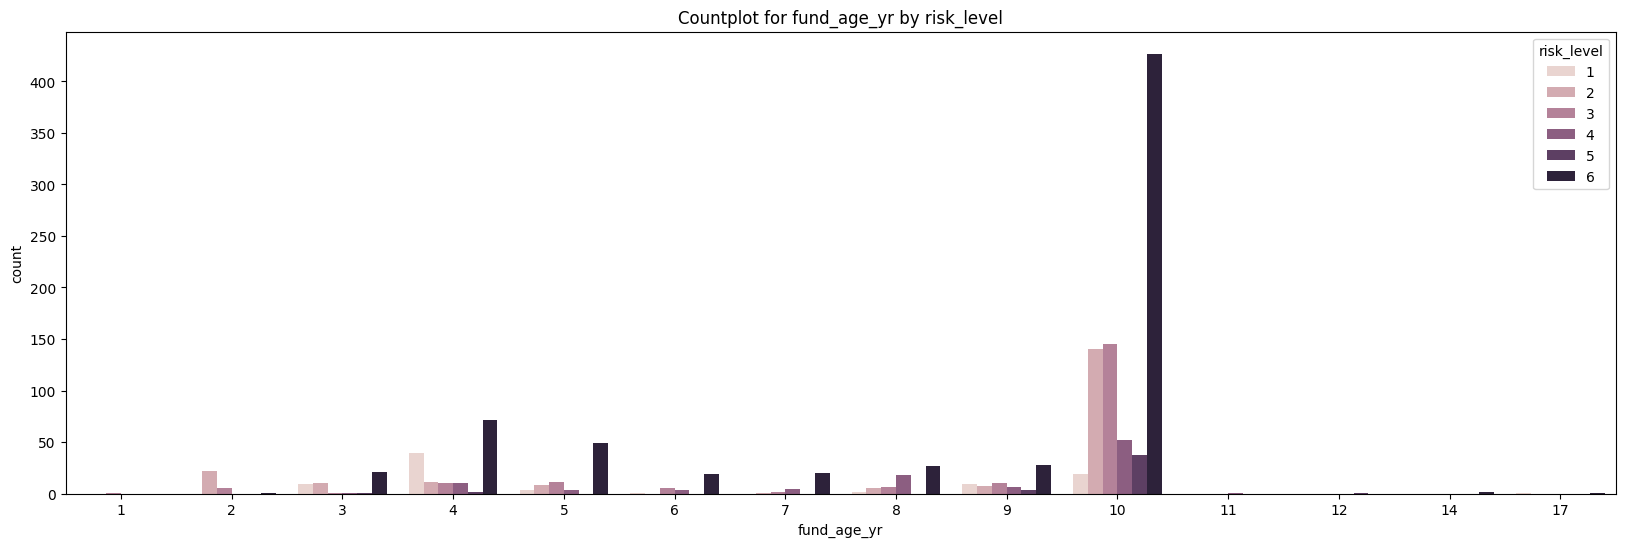

In [18]:
# Plot 3: Countplot for Job
plt.figure(figsize=(20, 6))
sns.countplot(x='fund_age_yr', hue='risk_level', data=df)
plt.title('Countplot for fund_age_yr by risk_level')
plt.show()

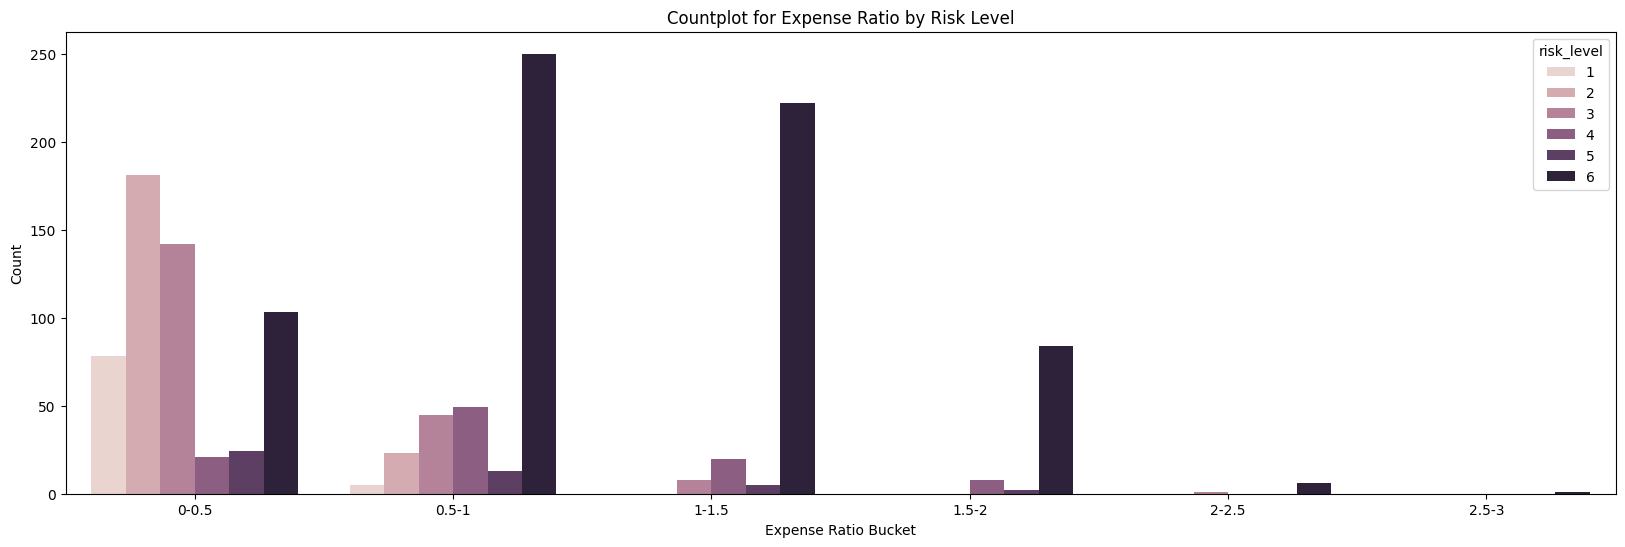

In [22]:
# Define the bucket ranges
bins = [0, 0.5, 1, 1.5,  2, 2.5, 3]
labels = ['0-0.5', '0.5-1', '1-1.5', '1.5-2', '2-2.5', '2.5-3']

# Create a new column 'expense_ratio_bucket' with the bucketed values
df['expense_ratio_bucket'] = pd.cut(df['expense_ratio'], bins=bins, labels=labels, include_lowest=True, right=False)

# Plot the countplot for the bucketed expense_ratio
plt.figure(figsize=(20, 6))
sns.countplot(x='expense_ratio_bucket', hue='risk_level', data=df)
plt.title('Countplot for Expense Ratio by Risk Level')
plt.xlabel('Expense Ratio Bucket')
plt.ylabel('Count')
plt.show()

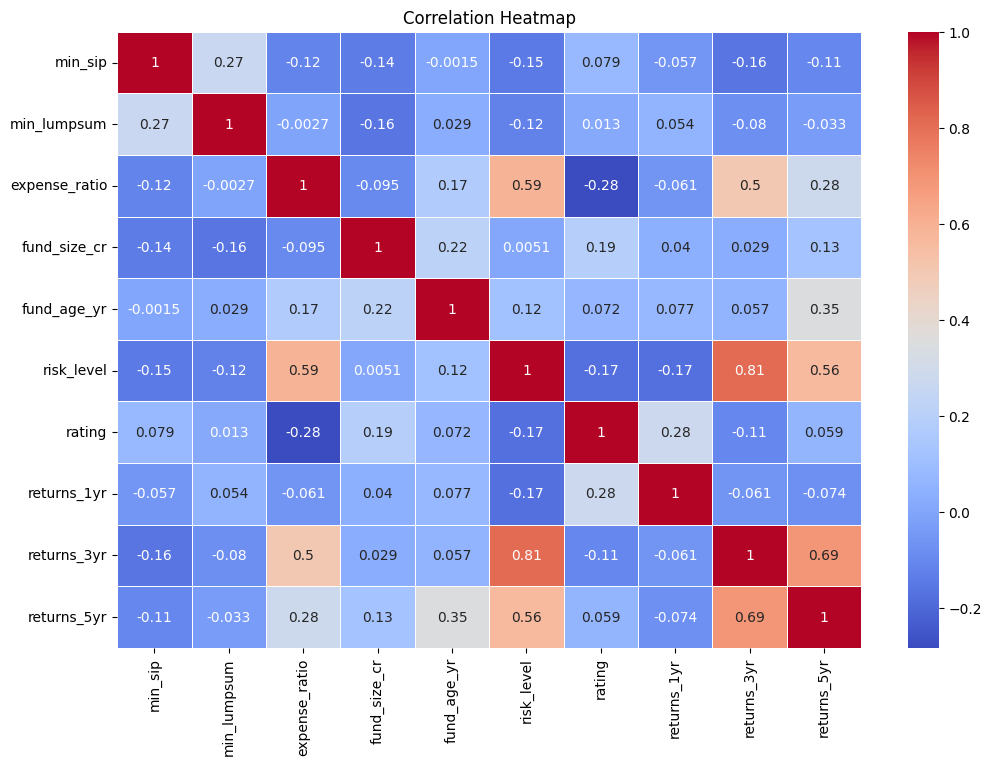

In [19]:
# Plot 4: Correlation heatmap
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [23]:
df.columns

Index(['scheme_name', 'min_sip', 'min_lumpsum', 'expense_ratio',
       'fund_size_cr', 'fund_age_yr', 'fund_manager', 'sortino', 'alpha', 'sd',
       'beta', 'sharpe', 'risk_level', 'amc_name', 'rating', 'category',
       'sub_category', 'returns_1yr', 'returns_3yr', 'returns_5yr',
       'expense_ratio_bucket'],
      dtype='object')

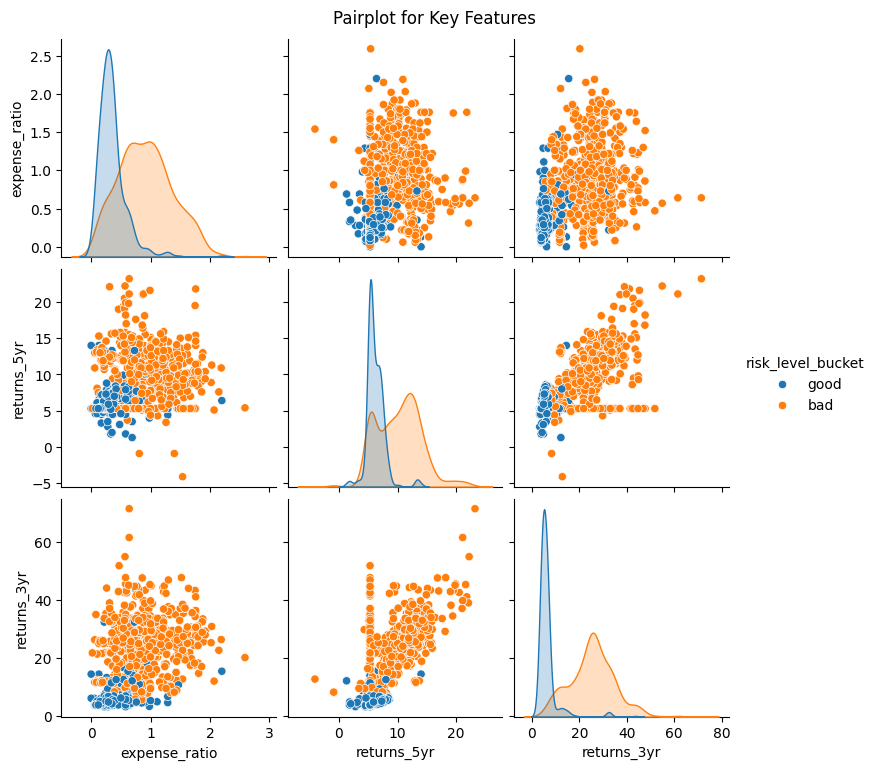

In [31]:
# Create a new risk_level bucket
df['risk_level_bucket'] = df['risk_level'].apply(lambda x: 'good' if x in [1, 2, 3] else 'bad')

# Plotting the pairplot
sns.pairplot(df[['expense_ratio', 'returns_5yr', 'returns_3yr', 'risk_level_bucket']], hue='risk_level_bucket')
plt.suptitle('Pairplot for Key Features', y=1.02)  # Adjust the title position
plt.show()

In [26]:
# Data Preprocessing

# Assuming 'risk_level_bucket' is the target variable
# Drop any rows with missing values for simplicity
df = df.dropna()

In [32]:
# Assuming 'risk_level_bucket' is the target variable
X = df.drop(['risk_level_bucket', 'risk_level'], axis=1)
y = df['risk_level_bucket']

In [33]:
# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)


In [34]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [36]:
# Decision Tree Model

# Create Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

In [37]:
# Fit the classifier to the training data
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [38]:
# Predictions on the testing set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [39]:
# Precision, Recall, Confusion Matrix
precision = precision_score(y_test, y_pred, pos_label='good')  # Assuming 'good' is the positive class
recall = recall_score(y_test, y_pred, pos_label='good')  # Assuming 'good' is the positive class
conf_matrix = confusion_matrix(y_test, y_pred, labels=['bad', 'good'])

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')


Precision: 0.96
Recall: 0.96
Confusion Matrix:
[[160   4]
 [  4  91]]


In [40]:
# F1 Score
f1 = f1_score(y_test, y_pred, pos_label='good')  # Assuming 'good' is the positive class

# Print the result
print(f'F1 Score: {f1:.2f}')


F1 Score: 0.96


In [41]:
# AUC-ROC
# Convert categorical labels to binary labels
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc

y_test_binary = LabelEncoder().fit_transform(y_test)

# AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)
roc_auc = auc(fpr, tpr)

# Print the AUC-ROC Score
print(f'AUC-ROC Score: {roc_auc:.2f}')


AUC-ROC Score: 0.97


In [42]:
# Print evaluation metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'ROC AUC Score: {roc_auc:.2f}')

Precision: 0.96
Recall: 0.96
F1-score: 0.96
Confusion Matrix:
[[160   4]
 [  4  91]]
ROC AUC Score: 0.97


In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Assuming label encoding has been done using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Generate predictions on the training data
train_pred = model.predict(X_train)  # Predict using your fitted model

train_pred_encoded = label_encoder.transform(train_pred)

# Training set performance
train_precision = precision_score(y_train_encoded, train_pred_encoded)
train_recall = recall_score(y_train_encoded, train_pred_encoded)
train_f1 = f1_score(y_train_encoded, train_pred_encoded)
train_roc_auc = roc_auc_score(y_train_encoded, model.predict_proba(X_train)[:, 1])



In [44]:
# Testing set performance

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming label encoding has been done using LabelEncoder
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Testing set performance
test_precision = precision_score(y_test_encoded, y_pred_encoded)
test_recall = recall_score(y_test_encoded, y_pred_encoded)
test_f1 = f1_score(y_test_encoded, y_pred_encoded)

# test_precision = precision_score(y_test, y_pred)
# test_recall = recall_score(y_test, y_pred)
# test_f1 = f1_score(y_test, y_pred)

In [45]:
# Print evaluation metrics
print("\nTesting Set Metrics:")
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'ROC AUC Score: {roc_auc:.2f}')


Testing Set Metrics:
Precision: 0.96
Recall: 0.96
F1-score: 0.96
Confusion Matrix:
[[160   4]
 [  4  91]]
ROC AUC Score: 0.97


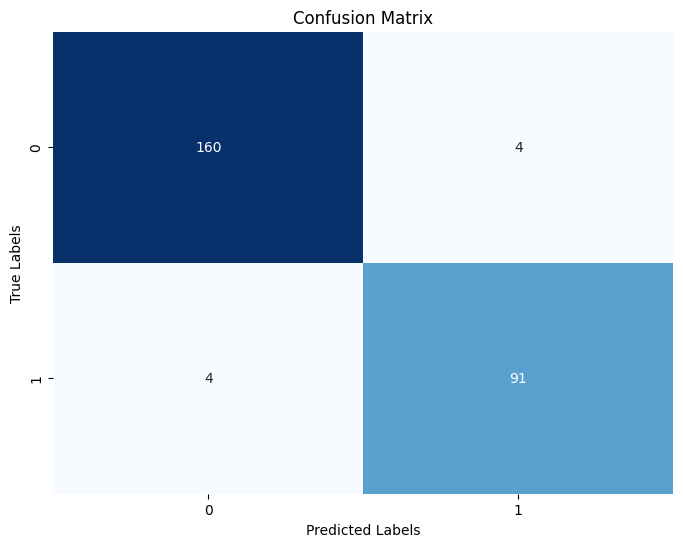

In [46]:
# Decision Tree Model Evaluation Metrics

# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

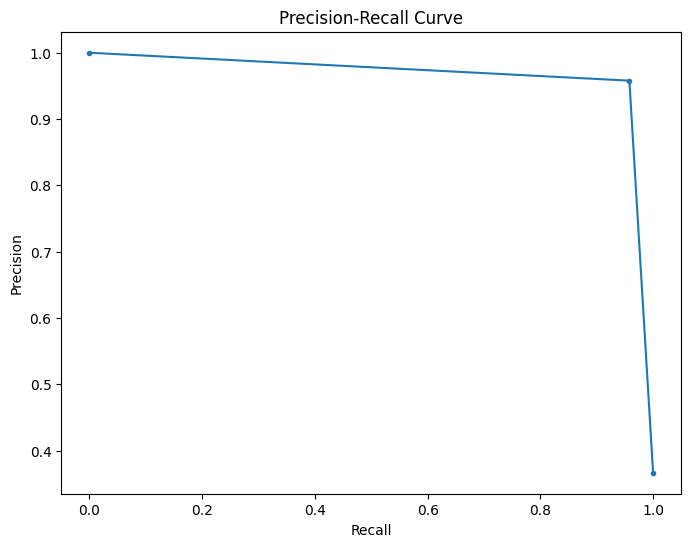

In [47]:
# Precision-Recall Curve

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_curve

# Assuming label encoding has been done using LabelEncoder
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Precision-Recall Curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test_encoded, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


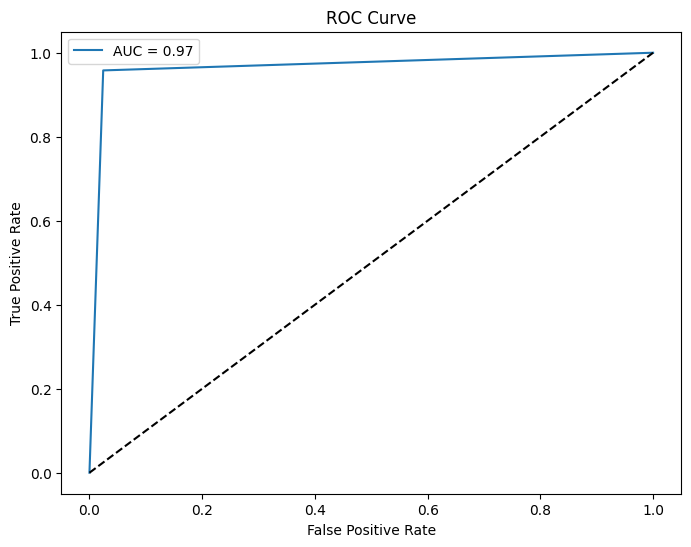

In [48]:
# ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

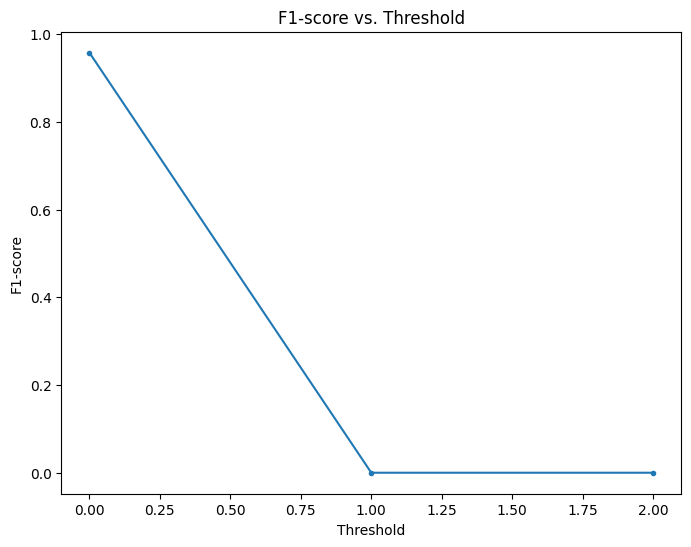

In [49]:
# F1-score Plot
from sklearn.metrics import f1_score

# Assuming label encoding has been done using LabelEncoder
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# F1-score Plot
f1_values = [f1_score(y_test_encoded, (y_prob > threshold).astype(int)) for threshold in thresholds]
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_values, marker='.')
plt.title('F1-score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.show()


In [50]:
# Print bias-variance metrics
print("\nTraining Set Metrics:")
print(f'Training Precision: {train_precision:.2f}')
print(f'Training Recall: {train_recall:.2f}')
print(f'Training F1-score: {train_f1:.2f}')
print(f'Training ROC AUC Score: {train_roc_auc:.2f}')

print("\nTesting Set Metrics:")
print(f'Testing Precision: {test_precision:.2f}')
print(f'Testing Recall: {test_recall:.2f}')
print(f'Testing F1-score: {test_f1:.2f}')


Training Set Metrics:
Training Precision: 1.00
Training Recall: 1.00
Training F1-score: 1.00
Training ROC AUC Score: 1.00

Testing Set Metrics:
Testing Precision: 0.96
Testing Recall: 0.96
Testing F1-score: 0.96


In [51]:
# HYPERPARAMETER TUNED DECISION TREE MODEL
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
# Adding hyperparameter tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'], # only these 2 are available in scikit-learn
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 50, 100, 200],
    'min_samples_split': [2, 5, 10, 20, 30 ,40],
    'min_samples_leaf': [1, 2, 4, 8 ,16, 32, 64]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_

# Printing the best parameters found by GridSearchCV
print("Best Parameters Found by GridSearchCV:\n", grid_search.best_params_)

# Training with the best hyperparameters
best_dt.fit(X_train, y_train)

# Evaluating the tuned model
y_pred_tuned = best_dt.predict(X_test)

print("Tuned Model Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))


Fitting 3 folds for each of 1176 candidates, totalling 3528 fits
Best Parameters Found by GridSearchCV:
 {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 30, 'splitter': 'best'}
Tuned Model Performance
Accuracy: 0.9575289575289575
Confusion Matrix:
 [[158   6]
 [  5  90]]
Classification Report:
               precision    recall  f1-score   support

         bad       0.97      0.96      0.97       164
        good       0.94      0.95      0.94        95

    accuracy                           0.96       259
   macro avg       0.95      0.96      0.95       259
weighted avg       0.96      0.96      0.96       259



In [52]:
y_prob_tuned = best_dt.predict_proba(X_test)[:, 1]

In [53]:
# AUC-ROC
# Convert categorical labels to binary labels
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc

y_test_binary = LabelEncoder().fit_transform(y_test)

# AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_tuned)
roc_auc = auc(fpr, tpr)

# Print the AUC-ROC score
print(f'AUC-ROC Score: {roc_auc:.2f}')


AUC-ROC Score: 0.97


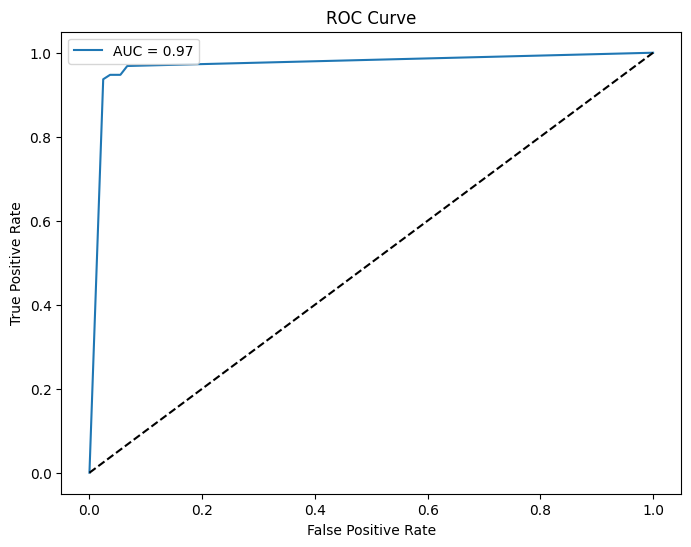

In [54]:
# ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()